In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import pydicom as pyd
import SimpleITK as sk
import math
import numpy as np
from numpy import savetxt
import torch
import torchio as tio

In [3]:
class DICOM_reader:
    def __init__(self):
        self.file_path = ""
        self.CT_images = []
    
    def set_path(self, path):
        self.file_path = Path(path)
    
    def extract_images(self):
        file_ids = sk.ImageSeriesReader.GetGDCMSeriesIDs(str(self.file_path))
        file_names = sk.ImageSeriesReader.GetGDCMSeriesFileNames(str(self.file_path), file_ids[0])
        series_reader = sk.ImageSeriesReader()
        series_reader.SetFileNames(file_names)
        image_data = series_reader.Execute()
        self.CT_images = sk.GetArrayFromImage(image_data)
                
    def visualize(self, images, if_all, idx=None):
        if if_all:
            idx = list(range(len(images)))
        num1 = math.ceil(math.sqrt(len(idx)))
        num2 = math.floor(math.sqrt(len(idx)))
        num1 = num1+1 if num1*num2<len(idx) else num1
        fig, axis = plt.subplots(num2, num1, figsize=(20,20))
        slice_counter = 0
        if len(idx)==1:
            axis.imshow(images[idx[slice_counter]], cmap="gray")
        else:
            if num2>1:
                for i in range(num2):
                    for j in range(num1):
                        if slice_counter<len(idx):
                            axis[i][j].imshow(images[idx[slice_counter]], cmap="gray")
                            slice_counter+=1
                        else:
                            break
            else:
                for i in range(num1):
                    axis[i].imshow(images[idx[slice_counter]], cmap="gray")
                    slice_counter+=1
                                
    def get_images(self):
        # self.CT_images = [np.expand_dims(np.array(image.astype("int32")),axis=0) for image in self.CT_images]
        return self.CT_images

In [4]:
reader = DICOM_reader()
reader.set_path("/Users/wangyangwu/Documents/Maastro/NeuralNets/PROTON/P0439C0006I1473766/CT/1.3.6.1.4.1.32722.228.6.63207665478764726756566005696578074318")
reader.extract_images()
# reader.visualize(True)
a = reader.get_images()
a.shape

(189, 512, 512)

In [15]:
max_p = a.max()
min_p = a.min()

In [7]:
X = torch.from_numpy(np.stack([a,a])).type(torch.float32)

In [8]:
X.shape

torch.Size([2, 189, 512, 512])

In [29]:
n = np.random.rand(3,3,3)

In [34]:
img = tio.ScalarImage(tensor=a)

ValueError: Input tensor must be 4D, but it is 3D

In [17]:
rescale = tio.RescaleIntensity(out_min_max=(0,1), in_min_max=(min_p, max_p))
img_norma = rescale(img)

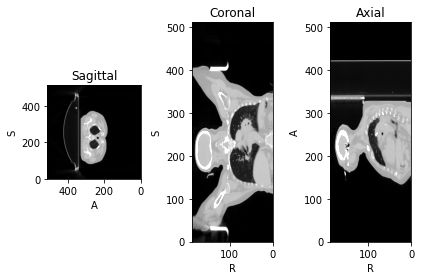

In [18]:
img_norma.plot()

In [35]:
t = img_norma.tensor

In [40]:
type(t.max().item())

float

In [23]:
reader = DICOM_reader()
reader.set_path("/Users/wangyangwu/Documents/Maastro/NeuralNets/PROTON/P0439C0006I1473766/RTDOSE/1.3.6.1.4.1.32722.228.6.334797647287977966709364212462384620209")
reader.extract_images()
# reader.visualize(True)
a = reader.get_images()
a.shape

(1, 99, 100, 191)

In [22]:
reader = DICOM_reader()
reader.set_path("/Users/wangyangwu/Documents/Maastro/NeuralNets/PROTON/P0439C0006I2866736/RTDOSE/1.3.6.1.4.1.32722.228.6.193151678283566152558336891472184601865")
reader.extract_images()
# reader.visualize(True)
a = reader.get_images()
a.shape

(1, 117, 110, 165)